### Seismic Attribute

#### Average Amplitude Attribute

This amplitude is determined by averaging selected amplitude or it is commonly called by moving average. First algorithm will be using Zero Padding method, for example:

Theory :
$$ S = [1,3,2,-1,0,4]$$

by using zero padding, it should be addedd by zero in every side
$$ S = [0,1,3,2,-1,0,4,0]$$

Then, zero padding values can be calculated by using moving average with certain number of window.
For example we will use window = 3 and the moving average results as below,

$$ \overline{S} = [\frac{2}{3},2,\frac{4}{3},\frac{1}{3},1,\frac{4}{3}] $$

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [74]:
t1 = time.time()
traces = np.loadtxt('traces2ms.txt')
print(traces.shape)

(1381, 372)


In [75]:
ns = traces.shape[0]
no = traces.shape[1]
window = 25

After writing the shape location on data, the next step is to determine the window value which is then input into the zero padding equation.

In [76]:
zp = int(np.floor(window/2))
print(zp)

12


In [77]:
matrix_zero = np.zeros((zp, no))
s2 = np.vstack((matrix_zero, traces, matrix_zero))
sm = np.zeros_like(traces)

After defining all the inputs, the next step is the stacking visualization, at this stage it will be shown which algorithms having the fastest processing time using "time library".

#### First Algorithm

time estimation for this algorithm = 17.239039182662964


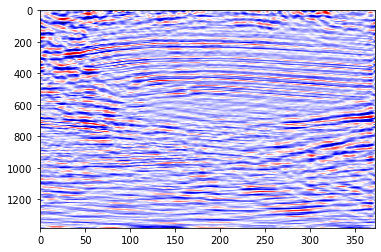

In [65]:
for j in np.arange(0, no, 1):
    for i in np.arange(0, ns, 1):
        sm[i, j] = np.mean(s2[np.arange(0,window,1) +i, j])
        
t2 = time.time()
print('time estimation for this algorithm =', t2-t1)
plt.imshow(sm, aspect='auto', interpolation='bilinear', cmap='seismic')
plt.show()

#### Second Algorithm

Time efficiency with vectorization, by cutting the number of iterations.

time estimation for this algorithm = 9.06063985824585


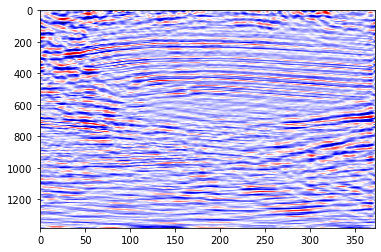

In [72]:
for i in np.arange(0, ns, 1):
    sm[i, :] = np.mean((s2[np.arange(0, window, 1) + i, :]), axis=0)

t2 = time.time()
print('time estimation for this algorithm =',t2-t1)
plt.imshow(sm, aspect='auto', interpolation='bilinear', cmap='seismic')
plt.show()

#### Third Algorithm

This algorithm uses the convolution method with the boxcar function.

Constant function design with data length along the window width and with a value of 1 / (window length).
For example:

Window =3, then

$$   W = [\frac{1}{3},\frac{1}{3},\frac{1}{3}] $$ 

window = 5
$$   W = [\frac{1}{5},\frac{1}{5},\frac{1}{5},\frac{1}{5},\frac{1}{5}] $$

The code can be made by creating matrix ones with the value as many as window then it divided by window value.

8.962948322296143


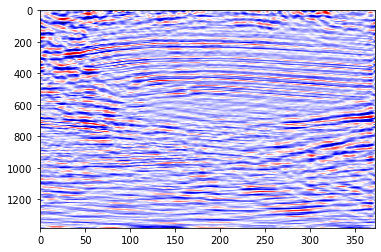

In [78]:
win = np.ones(window)/window
for j in np.arange(0, no, 1):
    sm[:, j] = np.convolve(traces[:, j], win,'same')
    
t2 = time.time()
print(t2-t1)
plt.imshow(sm, aspect='auto', interpolation='bilinear', cmap='seismic')
plt.show()

##### Absolute Average Amplitude Attribute

This average amplitude attribute should be made in absolute value, then averaged.

$$X_i = \frac{1}{N}\sum_{i=-N/2}^{+N/2}|S_{i+j}|$$

N = width of window

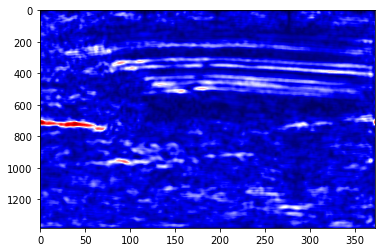

In [79]:
for i in np.arange(0, ns, 1):
    sm[i, :] = np.mean(abs(s2[np.arange(0, window, 1) + i, :]), axis=0)

plt.imshow(sm, aspect='auto', interpolation='bilinear', cmap='seismic')
plt.show()

##### RMS Amplitude Attribute
In this RMS amplitude attribute, the window value is not only averaged, but first squared and then rooted.


$$X_i = \sqrt{\frac{1}{N}\sum_{i=-N/2}^{+N/2}|S^2_{i+j}|}$$

N = width of window

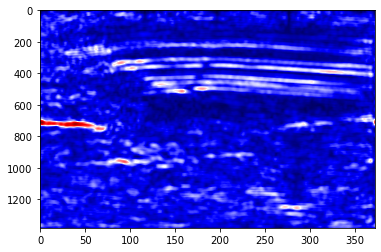

In [81]:
for i in np.arange(0, ns, 1):
    sm[i, :] = np.sqrt(np.mean((s2[np.arange(0, window, 1) + i, :])**2, axis=0))

plt.imshow(sm, aspect='auto', interpolation='bilinear', cmap='seismic')
plt.show()